# Converter : Symbolic Music representations


In [24]:
from midiConverter import Converter
from Visualizer import Visualizer
from MidiLikeSeq import MidiLikeSeq
from NoteTupleSeq import NoteTupleSeq
import matplotlib.pyplot as plt

import pandas as pd
import pretty_midi as pm
from note_seq.protobuf import music_pb2
import note_seq
import glob

## Midi to Midi-Like
Midi file used: 

In [25]:
midi_file = "monophonic-and-pauses.mid"
path = "midi-files-test/"
path_save = "generated-midi-files/"

In [26]:
c = Converter()
midi_like_seq = c.midi2midi_like(path + midi_file)
midi_like_seq.show()

seq = c.midi_like2seq(midi_like_seq)
note_seq.sequence_proto_to_midi_file(seq,path_save + midi_file[:-4]+ "_midi_like.mid")


FileNotFoundError: [Errno 2] No such file or directory: 'midi-files-test/monophonic-with-pauses.mid'

Number of instruments :  1


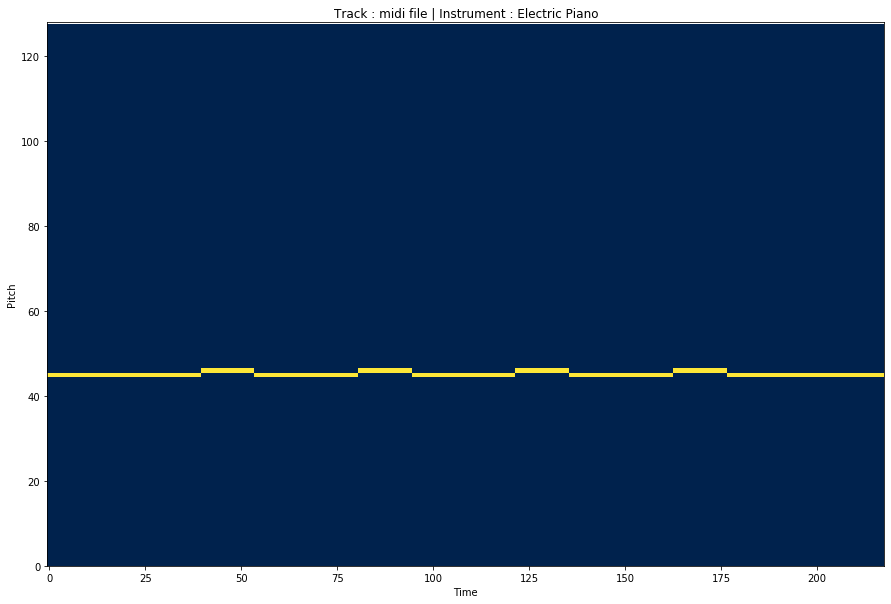

In [15]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)
v1.show_midi_notes(DEBUG = True)

Number of instruments :  1


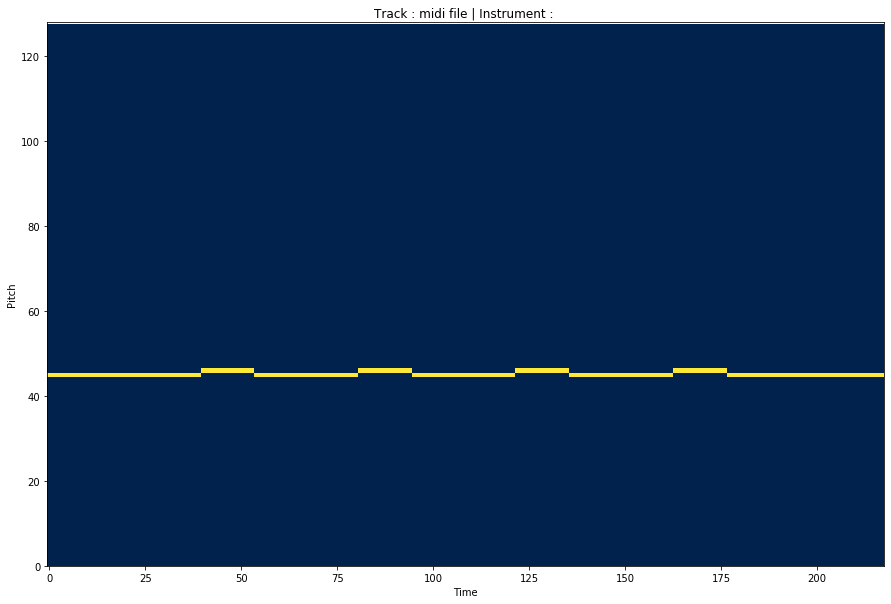

In [16]:

midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_midi_like.mid")
v2 = Visualizer(midi_data)

v2.show_midi_notes(DEBUG = True)


### Comparison between original and reconstruct : 

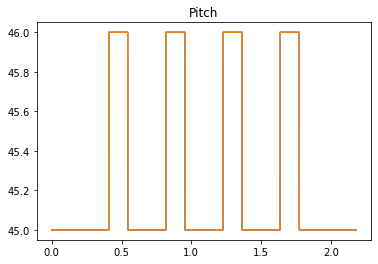

In [17]:


t1, p1, l1 = v1.get_time_f0_loudness()
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t1, p1[0], label = "original")
plt.plot(t2, p2[0], label = "reconstruct")
plt.title("Pitch")
plt.show()

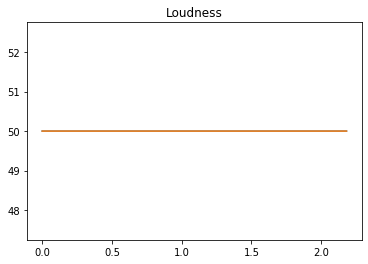

In [18]:
plt.plot(t1, l1[0], label = "original")
plt.plot(t2, l2[0], label = "reconstruct")
plt.title("Loudness")
plt.show()

## Midi to Note tuple :


Converting midi to note tuple : 

In [19]:
c = Converter()

note_tuple_seq = c.midi2note_tuple(path + midi_file)
note_tuple_seq

(0,0,45,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,46,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,46,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,46,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,46,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)

Converting back to midi

In [20]:
seq = c.note_tuple2seq(note_tuple_seq)
note_seq.sequence_proto_to_midi_file(seq, path_save +  midi_file[:-4]+"_note_tuple.mid")

Checking results :

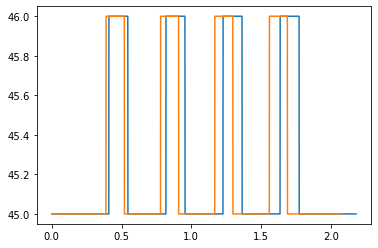

In [21]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)
midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_note_tuple.mid")
v2 = Visualizer(midi_data)



t1, p1, l1 = v1.get_time_f0_loudness()
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t1, p1[0], label = "original")
plt.plot(t2, p2[0], label = "reconstruct")
plt.show()

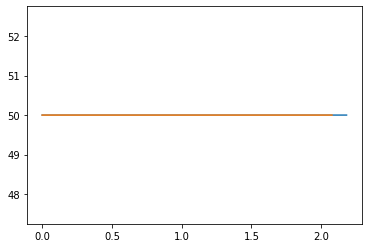

In [22]:
plt.plot(t1, l1[0], label = "original")
plt.plot(t2, l2[0], label = "reconstruct")
plt.show()

We observe slight time variations -> due to time quantification for note tuple